In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프에 대한 기본설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False


### 데이터 불러온다.

In [3]:
df1 = pd.read_csv('data/nba_2018.csv')
df1

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Notes
0,"Tue, Oct 17, 2017",8:01p,Boston Celtics,99,Cleveland Cavaliers,102,Box Score,NaN,20562,NaN
1,"Tue, Oct 17, 2017",10:30p,Houston Rockets,122,Golden State Warriors,121,Box Score,NaN,19596,NaN
2,"Wed, Oct 18, 2017",7:00p,Charlotte Hornets,90,Detroit Pistons,102,Box Score,NaN,20491,NaN
3,"Wed, Oct 18, 2017",7:00p,Brooklyn Nets,131,Indiana Pacers,140,Box Score,NaN,15008,NaN
4,"Wed, Oct 18, 2017",7:00p,Miami Heat,109,Orlando Magic,116,Box Score,NaN,18846,NaN
...,...,...,...,...,...,...,...,...,...,...
99,"Mon, Oct 30, 2017",10:30p,Golden State Warriors,141,Los Angeles Clippers,113,Box Score,NaN,19068,NaN
100,"Tue, Oct 31, 2017",7:00p,Sacramento Kings,83,Indiana Pacers,101,Box Score,NaN,12245,NaN
101,"Tue, Oct 31, 2017",7:30p,Phoenix Suns,122,Brooklyn Nets,114,Box Score,NaN,12936,NaN
102,"Tue, Oct 31, 2017",8:00p,Oklahoma City Thunder,110,Milwaukee Bucks,91,Box Score,NaN,16713,NaN


In [4]:
# 데이터 프레임 정보 확인
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             104 non-null    object 
 1   Start (ET)       104 non-null    object 
 2   Visitor/Neutral  104 non-null    object 
 3   PTS              104 non-null    int64  
 4   Home/Neutral     104 non-null    object 
 5   PTS.1            104 non-null    int64  
 6   Unnamed: 6       104 non-null    object 
 7   Unnamed: 7       2 non-null      object 
 8   Attend.          104 non-null    int64  
 9   Notes            0 non-null      float64
dtypes: float64(1), int64(3), object(6)
memory usage: 8.2+ KB


### 데이터 전처리

In [5]:
# 컬럼 이름 확인
df1.columns

Index(['Date', 'Start (ET)', 'Visitor/Neutral', 'PTS', 'Home/Neutral', 'PTS.1',
       'Unnamed: 6', 'Unnamed: 7', 'Attend.', 'Notes'],
      dtype='object')

In [6]:
# 컬럼 이름을 변경한다.
df1.columns = ['경기일자', '경기시간', '방문팀', '방문팀점수', '홈팀',
               '홈팀점수', 'Box', '연장전여부', '관중수', 'Notes']
df1

,경기일자,경기시간,방문팀,방문팀점수,홈팀,홈팀점수,Box,연장전여부,관중수,Notes
0,"Tue, Oct 17, 2017",8:01p,Boston Celtics,99,Cleveland Cavaliers,102,Box Score,NaN,20562,NaN
1,"Tue, Oct 17, 2017",10:30p,Houston Rockets,122,Golden State Warriors,121,Box Score,NaN,19596,NaN
2,"Wed, Oct 18, 2017",7:00p,Charlotte Hornets,90,Detroit Pistons,102,Box Score,NaN,20491,NaN
3,"Wed, Oct 18, 2017",7:00p,Brooklyn Nets,131,Indiana Pacers,140,Box Score,NaN,15008,NaN
4,"Wed, Oct 18, 2017",7:00p,Miami Heat,109,Orlando Magic,116,Box Score,NaN,18846,NaN
...,...,...,...,...,...,...,...,...,...,...
99,"Mon, Oct 30, 2017",10:30p,Golden State Warriors,141,Los Angeles Clippers,113,Box Score,NaN,19068,NaN
100,"Tue, Oct 31, 2017",7:00p,Sacramento Kings,83,Indiana Pacers,101,Box Score,NaN,12245,NaN
101,"Tue, Oct 31, 2017",7:30p,Phoenix Suns,122,Brooklyn Nets,114,Box Score,NaN,12936,NaN
102,"Tue, Oct 31, 2017",8:00p,Oklahoma City Thunder,110,Milwaukee Bucks,91,Box Score,NaN,16713,NaN


In [7]:
# 결측치 확인
df1.isna().sum()

경기일자       0
경기시간       0
방문팀        0
방문팀점수      0
홈팀         0
홈팀점수       0
Box        0
연장전여부    102
관중수        0
Notes    104
dtype: int64

In [8]:
# 연장전 여부의 결측를 NOT 으로 채워준다.
df1['연장전여부'].fillna('NOT', inplace=True)
df1.isna().sum()

경기일자       0
경기시간       0
방문팀        0
방문팀점수      0
홈팀         0
홈팀점수       0
Box        0
연장전여부      0
관중수        0
Notes    104
dtype: int64

In [9]:
# 날짜 데이터 확인
# 경기 일자가 문자열로 되어 있기 때문에 시간 값으로 변경해야 한다.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   경기일자    104 non-null    object 
 1   경기시간    104 non-null    object 
 2   방문팀     104 non-null    object 
 3   방문팀점수   104 non-null    int64  
 4   홈팀      104 non-null    object 
 5   홈팀점수    104 non-null    int64  
 6   Box     104 non-null    object 
 7   연장전여부   104 non-null    object 
 8   관중수     104 non-null    int64  
 9   Notes   0 non-null      float64
dtypes: float64(1), int64(3), object(6)
memory usage: 8.2+ KB


In [10]:
# 날짜 데이터를 원하는 양식으로 변경하는 것이 좋다.
# 날짜 체계를 의마하는 문자를 넣어 날짜 형태를 지정한다.
# https://pandas.pydata.org/docs/reference/api/pandas.Period.strftime.html
# Tue, Oct 17, 2017
df1['경기일자'] = pd.to_datetime(df1['경기일자'], format='%a, %b %d, %Y')
df1

,경기일자,경기시간,방문팀,방문팀점수,홈팀,홈팀점수,Box,연장전여부,관중수,Notes
0,2017-10-17,8:01p,Boston Celtics,99,Cleveland Cavaliers,102,Box Score,NOT,20562,NaN
1,2017-10-17,10:30p,Houston Rockets,122,Golden State Warriors,121,Box Score,NOT,19596,NaN
2,2017-10-18,7:00p,Charlotte Hornets,90,Detroit Pistons,102,Box Score,NOT,20491,NaN
3,2017-10-18,7:00p,Brooklyn Nets,131,Indiana Pacers,140,Box Score,NOT,15008,NaN
4,2017-10-18,7:00p,Miami Heat,109,Orlando Magic,116,Box Score,NOT,18846,NaN
...,...,...,...,...,...,...,...,...,...,...
99,2017-10-30,10:30p,Golden State Warriors,141,Los Angeles Clippers,113,Box Score,NOT,19068,NaN
100,2017-10-31,7:00p,Sacramento Kings,83,Indiana Pacers,101,Box Score,NOT,12245,NaN
101,2017-10-31,7:30p,Phoenix Suns,122,Brooklyn Nets,114,Box Score,NOT,12936,NaN
102,2017-10-31,8:00p,Oklahoma City Thunder,110,Milwaukee Bucks,91,Box Score,NOT,16713,NaN


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   경기일자    104 non-null    datetime64[ns]
 1   경기시간    104 non-null    object        
 2   방문팀     104 non-null    object        
 3   방문팀점수   104 non-null    int64         
 4   홈팀      104 non-null    object        
 5   홈팀점수    104 non-null    int64         
 6   Box     104 non-null    object        
 7   연장전여부   104 non-null    object        
 8   관중수     104 non-null    int64         
 9   Notes   0 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 8.2+ KB


### 필요한 컬럼만 추출해서 정리한다.

In [12]:
a1 = ['경기일자', '방문팀', '방문팀점수', '홈팀', '홈팀점수']
games_df1 = df1[a1]
games_df1

,경기일자,방문팀,방문팀점수,홈팀,홈팀점수
0,2017-10-17,Boston Celtics,99,Cleveland Cavaliers,102
1,2017-10-17,Houston Rockets,122,Golden State Warriors,121
2,2017-10-18,Charlotte Hornets,90,Detroit Pistons,102
3,2017-10-18,Brooklyn Nets,131,Indiana Pacers,140
4,2017-10-18,Miami Heat,109,Orlando Magic,116
...,...,...,...,...,...
99,2017-10-30,Golden State Warriors,141,Los Angeles Clippers,113
100,2017-10-31,Sacramento Kings,83,Indiana Pacers,101
101,2017-10-31,Phoenix Suns,122,Brooklyn Nets,114
102,2017-10-31,Oklahoma City Thunder,110,Milwaukee Bucks,91


In [13]:
# 경기 일자 컬럼을 인덱스로 지정한다.
# 현재의 index를 경기 번호로 사용할 것이기 때문에 유기하기 위해
# append를 True로 설정한다.
games_df2 = games_df1.set_index('경기일자', append=True)
games_df2

,,방문팀,방문팀점수,홈팀,홈팀점수
,경기일자,,,,
0,2017-10-17,Boston Celtics,99,Cleveland Cavaliers,102
1,2017-10-17,Houston Rockets,122,Golden State Warriors,121
2,2017-10-18,Charlotte Hornets,90,Detroit Pistons,102
3,2017-10-18,Brooklyn Nets,131,Indiana Pacers,140
4,2017-10-18,Miami Heat,109,Orlando Magic,116
...,...,...,...,...,...
99,2017-10-30,Golden State Warriors,141,Los Angeles Clippers,113
100,2017-10-31,Sacramento Kings,83,Indiana Pacers,101
101,2017-10-31,Phoenix Suns,122,Brooklyn Nets,114


In [14]:
# 인덱스의 이름을 지정한다.
games_df3 = games_df2.rename_axis(['게임', '경기일자'])
games_df3

,,방문팀,방문팀점수,홈팀,홈팀점수
게임,경기일자,,,,
0,2017-10-17,Boston Celtics,99,Cleveland Cavaliers,102
1,2017-10-17,Houston Rockets,122,Golden State Warriors,121
2,2017-10-18,Charlotte Hornets,90,Detroit Pistons,102
3,2017-10-18,Brooklyn Nets,131,Indiana Pacers,140
4,2017-10-18,Miami Heat,109,Orlando Magic,116
...,...,...,...,...,...
99,2017-10-30,Golden State Warriors,141,Los Angeles Clippers,113
100,2017-10-31,Sacramento Kings,83,Indiana Pacers,101
101,2017-10-31,Phoenix Suns,122,Brooklyn Nets,114


### melt 함수 사용해보기

In [15]:
df = pd.read_csv('data/grade.csv', encoding='euc-kr')
df

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


In [16]:
# melt 함수는 기준이 되는 컬럼의 값을 기준으로 어떤 컬럼의 값이 무엇인지를
# 담고 있는 데이터프레임을 생성한다.
# id_vars : 기준이 되는 컬럼 이름
# value_vars : 어떤 컬럼의 값이 무엇인지 확인..
# value_vars에 있는 컬럼명들도 데이터에 포함이 되 그 컬럼의 값도
# 포함된다.

# 아래의 코드는 각 학생별 국어, 영어 점수 데이터가 된다.
df.melt(id_vars='이름', value_vars=['국어', '수학'], var_name='과목',
       value_name='점수')

,이름,과목,점수
0,철수,국어,98.0
1,영희,국어,88.0
2,민수,국어,92.0
3,수현,국어,63.0
4,호영,국어,120.0
5,철수,수학,88.0
6,영희,수학,62.0
7,민수,수학,NaN
8,수현,수학,31.0
9,호영,수학,NaN


In [17]:
# 게임번호와 경기일자를 데이터에 포함시킨다.
a1 = games_df3.reset_index()
a1

,게임,경기일자,방문팀,방문팀점수,홈팀,홈팀점수
0,0,2017-10-17,Boston Celtics,99,Cleveland Cavaliers,102
1,1,2017-10-17,Houston Rockets,122,Golden State Warriors,121
2,2,2017-10-18,Charlotte Hornets,90,Detroit Pistons,102
3,3,2017-10-18,Brooklyn Nets,131,Indiana Pacers,140
4,4,2017-10-18,Miami Heat,109,Orlando Magic,116
...,...,...,...,...,...,...
99,99,2017-10-30,Golden State Warriors,141,Los Angeles Clippers,113
100,100,2017-10-31,Sacramento Kings,83,Indiana Pacers,101
101,101,2017-10-31,Phoenix Suns,122,Brooklyn Nets,114
102,102,2017-10-31,Oklahoma City Thunder,110,Milwaukee Bucks,91


In [18]:
tidy = pd.melt(a1, id_vars=['게임','경기일자'],
               value_vars=['방문팀', '홈팀'],
               var_name='팀구분', value_name='팀')
tidy

,게임,경기일자,팀구분,팀
0,0,2017-10-17,방문팀,Boston Celtics
1,1,2017-10-17,방문팀,Houston Rockets
2,2,2017-10-18,방문팀,Charlotte Hornets
3,3,2017-10-18,방문팀,Brooklyn Nets
4,4,2017-10-18,방문팀,Miami Heat
...,...,...,...,...
203,99,2017-10-30,홈팀,Los Angeles Clippers
204,100,2017-10-31,홈팀,Indiana Pacers
205,101,2017-10-31,홈팀,Brooklyn Nets
206,102,2017-10-31,홈팀,Milwaukee Bucks


In [19]:
tidy.query('게임 == 0')

,게임,경기일자,팀구분,팀
0,0,2017-10-17,방문팀,Boston Celtics
104,0,2017-10-17,홈팀,Cleveland Cavaliers


In [20]:
# diff 함수
# 현재 값이 이전 값보다 얼마나 등락했는지를 계산하는 함수
a1 = tidy.query('팀 == "Boston Celtics"')

# 경기일자를 기준으로 정렬한다.
a2 = a1.sort_values('경기일자')

# 날짜 간격을 구한다.
a2['경기일자'].diff()

0        NaT
110   1 days
19    2 days
154   4 days
66    2 days
79    2 days
195   2 days
Name: 경기일자, dtype: timedelta64[ns]

In [21]:
# 각 팀별로 그룹을 묶고 그 안에서 전날보다 몇일 후에 경기를 했는지
# 계산해서 가져온다.

# 경기 일자별로 정렬한다.
tidy.sort_values('경기일자', inplace=True)
# tidy

# 팀별로 그룹을 묶은 후 경기 일자를 가지고 diff 함수를 사용한다.
a1 = tidy.groupby('팀')['경기일자'].diff()

# 구한 날짜값을 정수로 변환한다.
a2 = a1.dt.days
# a2

# 날짜 차이값이 1일인 날짜를 가져온다.
tidy[a2 == 1]

,게임,경기일자,팀구분,팀
110,6,2017-10-18,홈팀,Boston Celtics
12,12,2017-10-18,방문팀,Houston Rockets
25,25,2017-10-20,방문팀,Los Angeles Lakers
33,33,2017-10-21,방문팀,Portland Trail Blazers
34,34,2017-10-21,방문팀,Sacramento Kings
36,36,2017-10-21,방문팀,Phoenix Suns
132,28,2017-10-21,홈팀,Cleveland Cavaliers
137,33,2017-10-21,홈팀,Milwaukee Bucks
30,30,2017-10-21,방문팀,Golden State Warriors
31,31,2017-10-21,방문팀,Indiana Pacers


In [22]:
# 구한 날짜 차이값을 휴식으로 계산하여 붙혀준다.
# 휴식을 계산을 위해 날짜 차이값을 1을 빼준다.
a2 = a2 - 1
a2

0      NaN
1      NaN
104    NaN
105    NaN
109    NaN
      ... 
102    2.0
101    2.0
100    1.0
206    1.0
207    2.0
Name: 경기일자, Length: 208, dtype: float64

In [23]:
# 결측치는 0으로 채워준다.
a2.fillna(0, inplace=True)
a2

0      0.0
1      0.0
104    0.0
105    0.0
109    0.0
      ... 
102    2.0
101    2.0
100    1.0
206    1.0
207    2.0
Name: 경기일자, Length: 208, dtype: float64

In [24]:
# 휴식일을 붙혀준다.
tidy['휴식일'] = a2
tidy

,게임,경기일자,팀구분,팀,휴식일
0,0,2017-10-17,방문팀,Boston Celtics,0.0
1,1,2017-10-17,방문팀,Houston Rockets,0.0
104,0,2017-10-17,홈팀,Cleveland Cavaliers,0.0
105,1,2017-10-17,홈팀,Golden State Warriors,0.0
109,5,2017-10-18,홈팀,Washington Wizards,0.0
...,...,...,...,...,...
102,102,2017-10-31,방문팀,Oklahoma City Thunder,2.0
101,101,2017-10-31,방문팀,Phoenix Suns,2.0
100,100,2017-10-31,방문팀,Sacramento Kings,1.0
206,102,2017-10-31,홈팀,Milwaukee Bucks,1.0


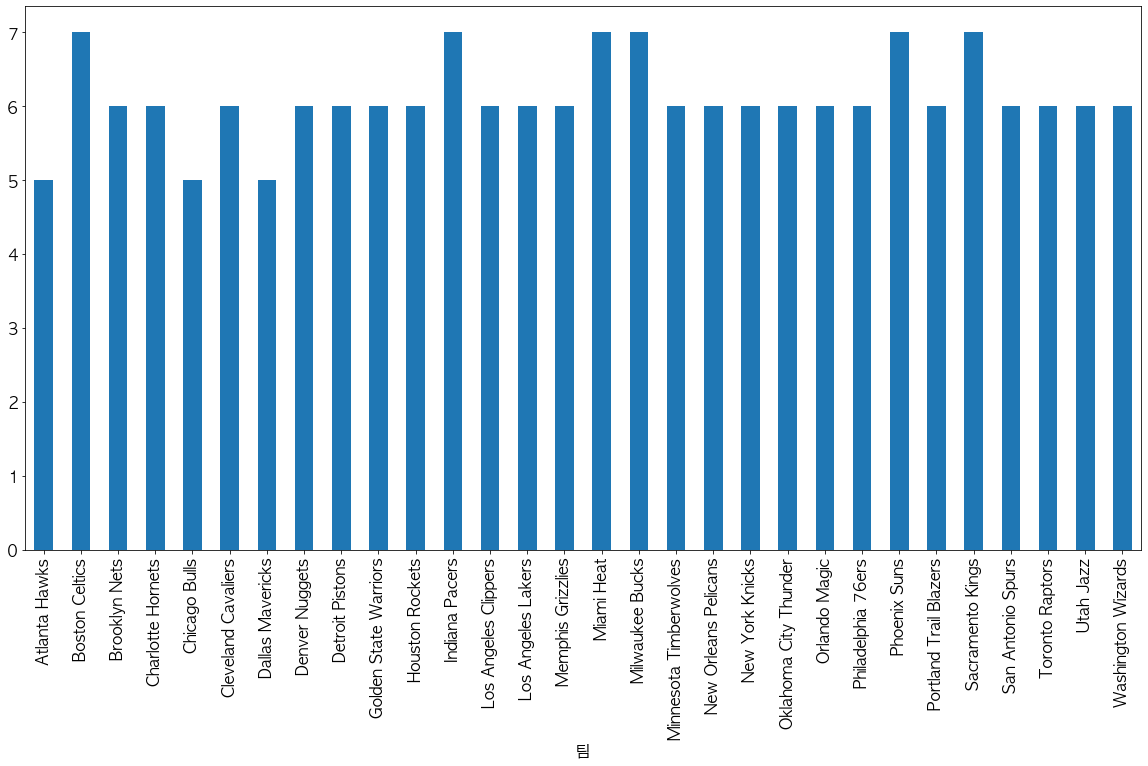

In [25]:
# 팀별 휴식을 수를 구한다.
a1 = tidy.groupby('팀')['휴식일'].sum()

# 시각화
a1.plot.bar()
plt.show()